In [1]:
# Q - A cloth manufacturing company is interested to know about the segment or attributes which causes high sale, using Random forest ?

In [2]:
# Import libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
sns.set_style('ticks')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading the input csv file

In [5]:
data = pd.read_csv("Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
# Check the statistics details from the data

In [7]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
# Checking for the null values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
data.shape

(400, 11)

In [11]:
data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [12]:
# Feature Engineering
#Finding the average of sales and considering all segments above that average value as fast moving products
#Sales is our target variable. We have to convert it into categorical variable.

<Axes: xlabel='Sales', ylabel='Count'>

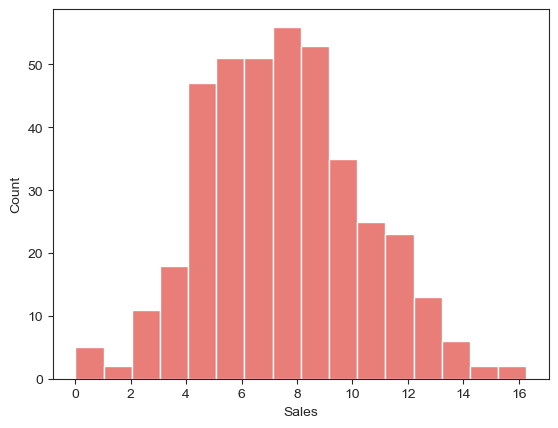

In [13]:
sns.histplot(data['Sales'])


In [14]:
data['Sales'].mean()

7.496325000000001

In [15]:
data['Sales'] = [1 if x>=7.5 else 0 for x in data['Sales']]

In [16]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,139,23,3,37,120,Medium,55,11,No,Yes
397,0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,100,79,7,284,95,Bad,50,12,Yes,Yes


In [17]:
data.replace({'Yes':1,'No':0,'Good':2,'Medium':1,'Bad':0}, inplace=True)

In [18]:
data.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,2,65,10,1,1
2,1,113,35,10,269,80,1,59,12,1,1
3,0,117,100,4,466,97,1,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
5,1,124,113,13,501,72,0,78,16,0,1
6,0,115,105,0,45,108,1,71,15,1,0
7,1,136,81,15,425,120,2,67,10,1,1
8,0,132,110,0,108,124,1,76,10,0,0
9,0,132,113,0,131,124,1,76,17,0,1


In [19]:
# Data Visualization

In [20]:
# Checking share of high and low sales in target column Sales

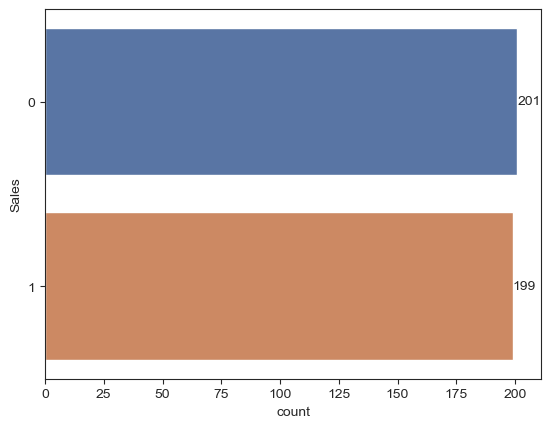

In [21]:
ax = sns.countplot(data=data, y='Sales', palette='deep')
ax.bar_label(ax.containers[0]);

In [22]:
# Boxplots and Histograms of numerical columns

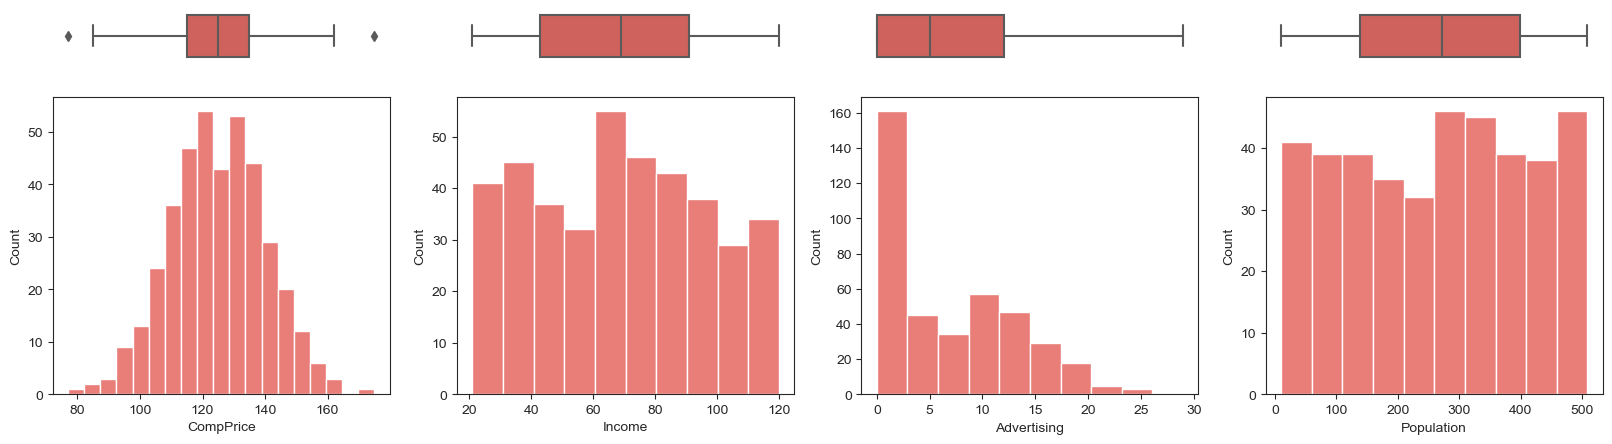

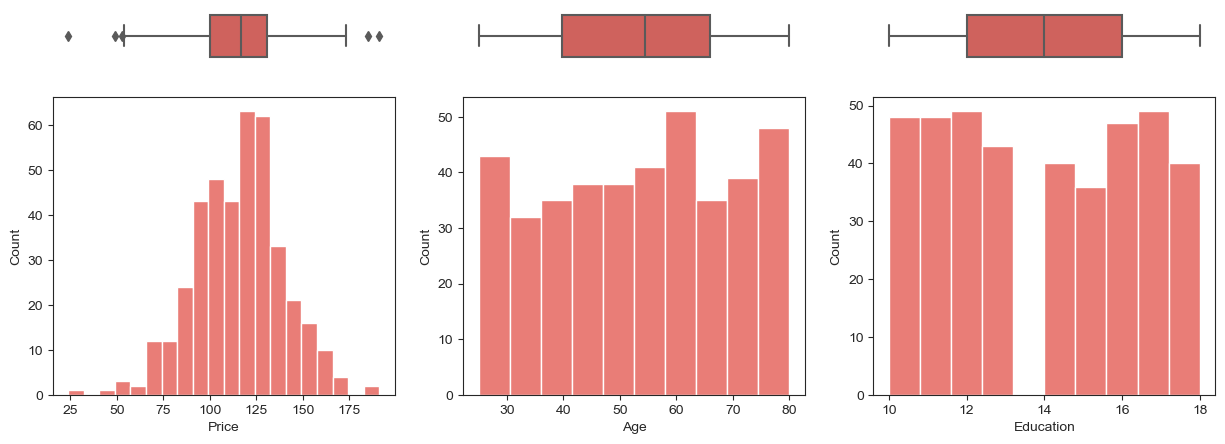

In [23]:
vars1 = ['CompPrice','Income','Advertising','Population']
vars2 = ['Price','Age','Education']

def plotboxhist(vars):
    figs, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=len(vars), figsize=(5*len(vars),5), gridspec_kw={'height_ratios':(0.15,0.85)})
    for i in range(len(vars)):
        sns.boxplot(data=data, x=vars[i], ax=ax_box[i])
        sns.histplot(data=data, x=vars[i], ax=ax_hist[i])
        sns.despine(ax=ax_box[i], left=True, bottom=True)
        ax_box[i].set_xticks([])
        ax_box[i].set_yticks([])
        ax_box[i].set_xlabel('')
    plt.show()

plotboxhist(vars1)
plotboxhist(vars2)

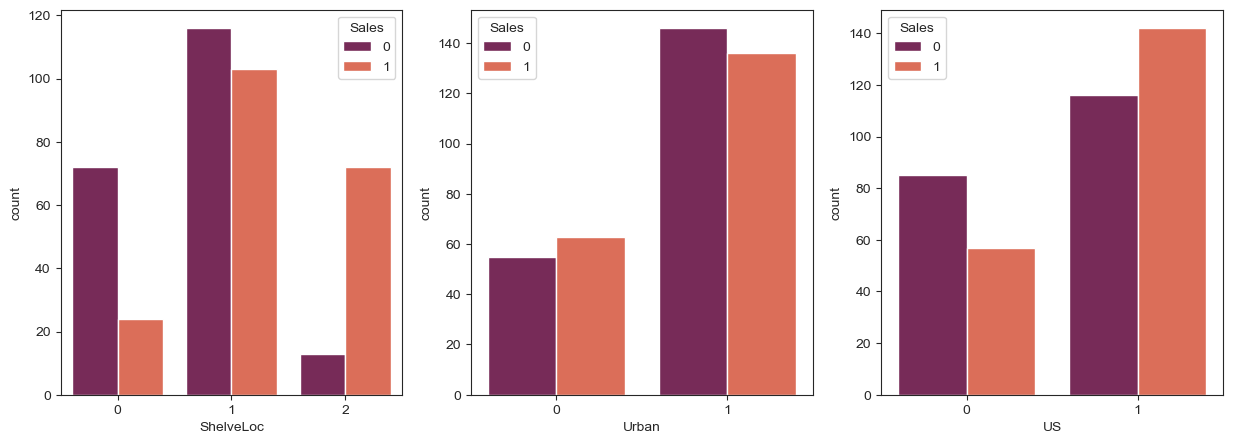

In [24]:
#Checking share of categories in categorical variables against sales
cat_var=['ShelveLoc','Urban','US']

plt.figure(figsize=(15,5)),
for i in range(len(cat_var)):
    plt.subplot(1,3,i+1)
    sns.countplot(data=data, x=cat_var[i], hue='Sales', palette='rocket')

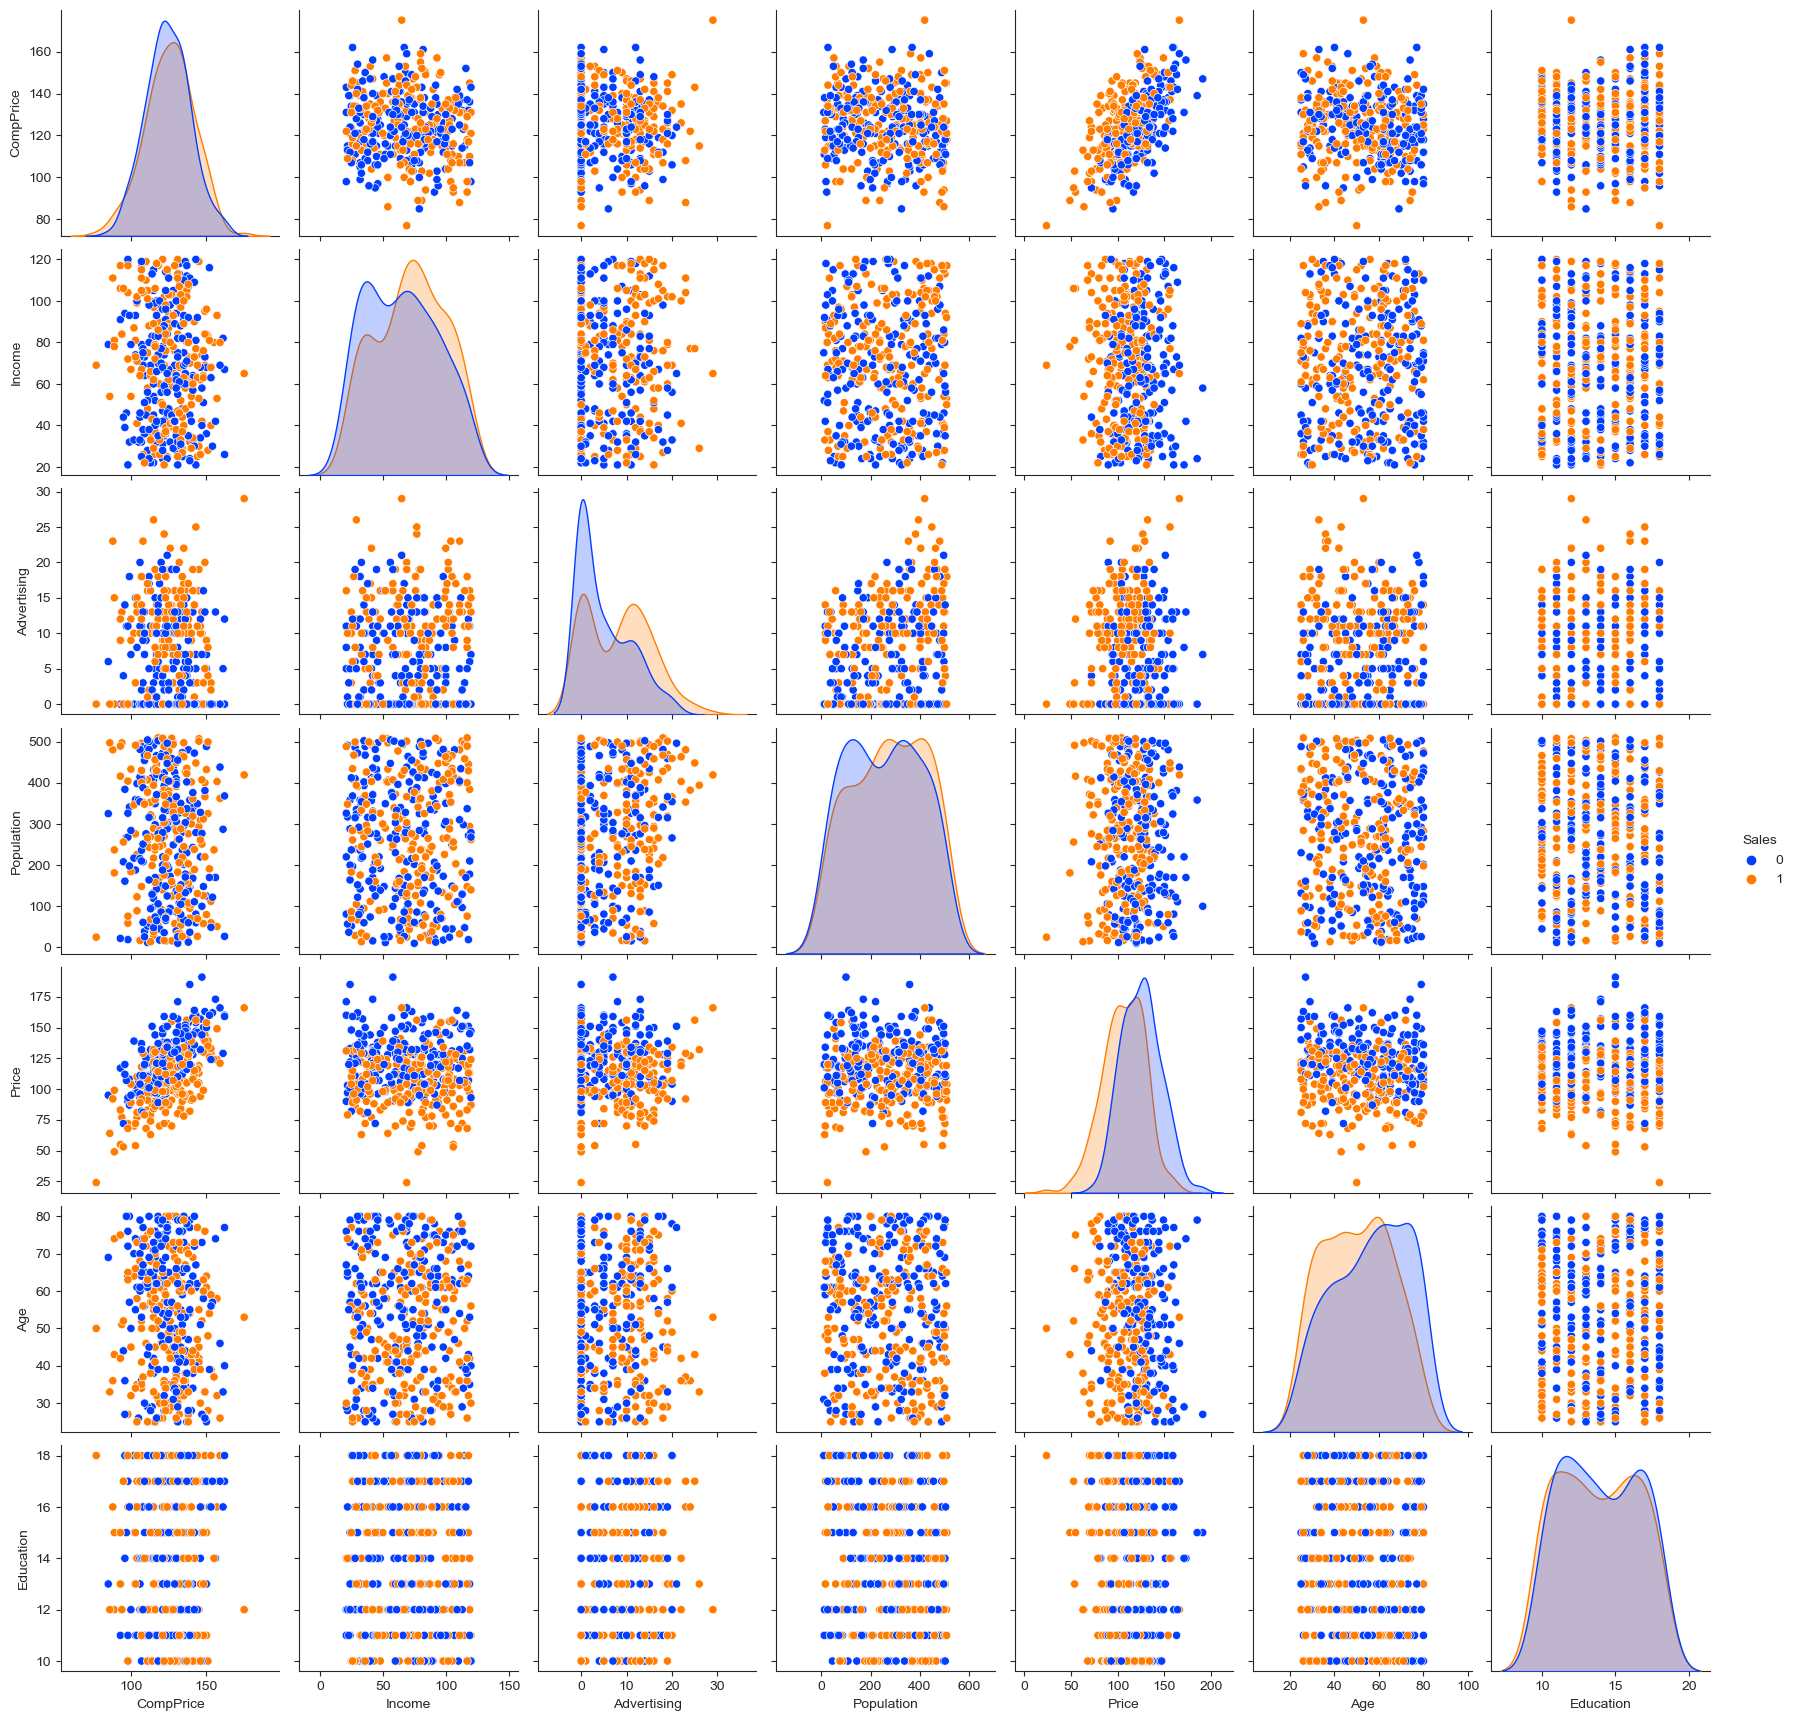

In [25]:
#Multivariate analysis
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=data.drop(cat_var,axis=1), hue='Sales', palette='bright')

In [26]:
# Preparing data for model

In [27]:
y = data['Sales']
x = data.drop('Sales', axis=1)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
#Model Building & Inferences

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV

In [32]:
rfc = RandomForestClassifier()
param_grid = dict(n_estimators=[100,150,200],
                  max_depth=[5, 10, 20, None],
                  max_features=['sqrt','log2',None],
                  criterion=['gini','entropy'])

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100
[CV 1/5; 1/72] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.863 total time=   0.1s
[CV 2/5; 1/72] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100
[CV 2/5; 1/72] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.762 total time=   0.0s
[CV 3/5; 1/72] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100
[CV 3/5; 1/72] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.812 total time=   0.0s
[CV 4/5; 1/72] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100
[CV 4/5; 1/72] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.725 total time=   0.0s
[CV 5/5; 1/72] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100
[CV 5/5; 1/72] END criterion=gini, max_d

In [33]:
print('Best: {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))

Best: 0.8225, using {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}


In [34]:
# Building model using best parameters

In [35]:
model = RandomForestClassifier(criterion='entropy',
                               max_depth=None,
                               max_features='sqrt',
                               n_estimators=100)

model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [36]:
#We can check importance of all features as following

In [37]:
model.feature_importances_

array([0.12979759, 0.09860362, 0.09599213, 0.0930617 , 0.25831424,
       0.11619231, 0.11863496, 0.05596337, 0.01921056, 0.01422953])

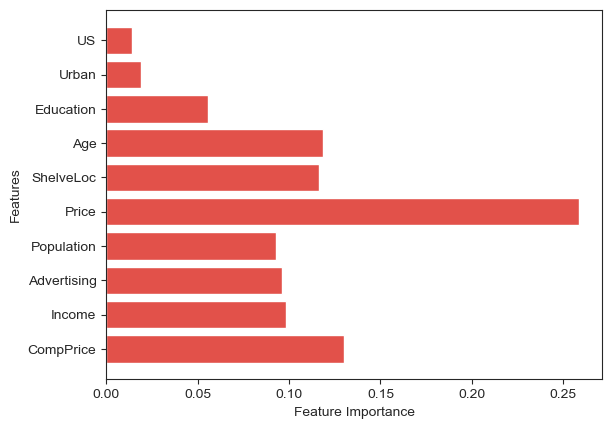

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your feature importance model and 'x' is your dataframe
plt.barh(range(10), model.feature_importances_)
plt.yticks(np.arange(10), x.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [39]:
# From here we can easily see Price is best feature

In [40]:
# Prediction on test data

In [41]:
preds = model.predict(x_test)

In [42]:
# Confusion Matrix

In [43]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales,,
0,30,5
1,10,35


In [44]:
# Accuracy

In [45]:
# Summarizing

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.88      0.78      0.82        45

    accuracy                           0.81        80
   macro avg       0.81      0.82      0.81        80
weighted avg       0.82      0.81      0.81        80



In [47]:
#Conclusion:

#The Random forest classifier with the feature_importance as three gives the highest accuracy of 85%.
#Thus, it is a good model to classify the segments or attributes in the cloth manufacturing which causes high sale.